In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('cancer_data_set - cancer_data_set.csv')

In [3]:
dataset.shape

(569, 32)

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [6]:
dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,2
smoothness_mean,0
compactness_mean,1
concavity_mean,1
concave points_mean,0


In [7]:
dataset["area_mean"]=dataset["area_mean"].fillna(dataset["area_mean"].mean())

In [8]:
dataset["compactness_mean"]=dataset["compactness_mean"].fillna(dataset["compactness_mean"].mean())

In [9]:
dataset["concavity_mean"]=dataset["concavity_mean"].fillna(dataset["concavity_mean"].mean())

In [10]:
dataset["fractal_dimension_mean"]=dataset["fractal_dimension_mean"].fillna(dataset["fractal_dimension_mean"].mean())

In [11]:
dataset["radius_se"]=dataset["radius_se"].fillna(dataset["radius_se"].mean())

In [12]:
dataset["area_se"]=dataset["area_se"].fillna(dataset["area_se"].mean())

In [13]:
dataset["concavity_se"]=dataset["concavity_se"].fillna(dataset["concavity_se"].mean())

In [14]:
dataset["concave points_se"]=dataset["concave points_se"].fillna(dataset["concave points_se"].mean())

In [15]:
dataset["compactness_worst"]=dataset["compactness_worst"].fillna(dataset["compactness_worst"].mean())

In [16]:
dataset["symmetry_worst"]=dataset["symmetry_worst"].fillna(dataset["symmetry_worst"].mean())

In [17]:
dataset.isnull().sum().sum()

0

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=0)

In [21]:
X = dataset.drop('diagnosis', axis=1)

In [22]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
Y = dataset['diagnosis']

In [24]:
Y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [26]:
model.fit(X_train,Y_train)

SVC(random_state=0)

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
accuracy_score(Y_test, y_pred)

0.5877192982456141

In [30]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[67,  0],
       [47,  0]])

<Axes: >

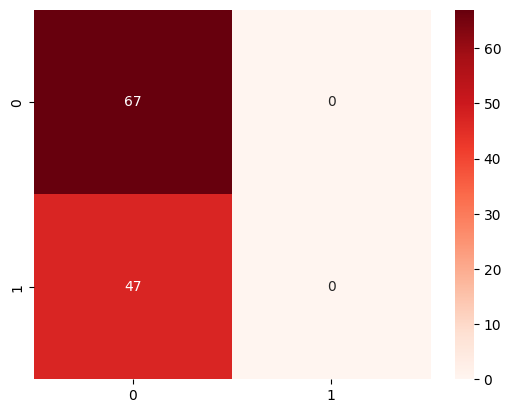

In [31]:
sns.heatmap(cm, annot=True,cmap='Reds')

In [32]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100, random_state=0)
model1.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_pred1 = model1.predict(X_test)

In [34]:
accuracy_score(Y_test,y_pred1)

0.9736842105263158

In [35]:
cm1 = confusion_matrix(Y_test, y_pred1)
cm1

array([[66,  1],
       [ 2, 45]])

<Axes: >

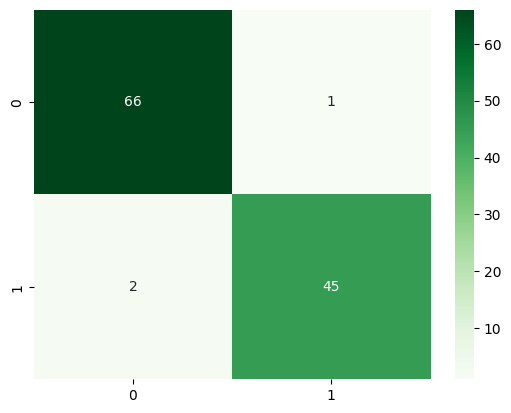

In [36]:
sns.heatmap(cm1, annot=True,cmap='Greens')

In [40]:
dataset.duplicated().sum()

0